In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

import datetime

# Import dataset

In [19]:
data_tnn = pd.read_excel("PKTNN_EBT_PASSENGER-BEHAVIOR.xlsx", sheet_name="DATA SET")
data_tnn.head()

,OrDes,A/C Type,Date,Day,Month,Pax,Allow (KG),EBT Rev (IDR),EBT (KG),Cargo (KG),TOTAL (KG)
0,KOE-WGP,ATR 72,1,Wednesday,JAN,29,435,54546,3.0,360,798.0
1,KOE-WGP,ATR 72,2,Thursday,JAN,48,720,163638,9.0,170,899.0
2,KOE-WGP,ATR 72,3,Friday,JAN,41,615,127274,7.0,516,1138.0
3,KOE-WGP,ATR 72,4,Saturday,JAN,39,585,0,0.0,440,1025.0
4,KOE-WGP,ATR 72,5,Sunday,JAN,55,825,127274,7.0,695,1527.0


# Variable initialitation

In [20]:
list_of_route_tnn = list(data_tnn.OrDes.unique())
print(list_of_route_tnn)

['KOE-WGP', 'WGP-KOE', 'KOE-LKA', 'LKA-KOE', 'KOE-TMC', 'TMC-KOE']


In [21]:
dict_of_month = {'JAN': 1,
                'FEB': 2,
                'MAR': 3}

In [22]:
list_of_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(list_of_day)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Function init

In [23]:
def week_number(month, date_):
    week = datetime.date(2020, dict_of_month[month], date_)
    return week.isocalendar()[1]

In [24]:
gk_tnn = data_tnn.groupby(['OrDes','Month'])
gk_tnn.first()

A/C Type  Date        Day  Pax  Allow (KG)  EBT Rev (IDR)  \
OrDes   Month                                                             
KOE-LKA FEB     ATR 72     1   Saturday   53         530              0   
        JAN     ATR 72     2   Thursday   53         530         400004   
        MAR     ATR 72     1     Sunday   62         620              0   
KOE-TMC FEB     ATR 72     1   Saturday   18         270         454550   
        JAN      ATR72     1  Wednesday   27         405              0   
        MAR     ATR 72     1     Sunday   38         570         400004   
KOE-WGP FEB     ATR 72     1   Saturday   13         195              0   
        JAN     ATR 72     1  Wednesday   29         435          54546   
        MAR     ATR 72     1     Sunday   53         795              0   
LKA-KOE FEB     ATR 72     1   Saturday   39         390          72728   
        JAN     ATR 72     2   Thursday   68         680         236366   
        MAR     ATR 72     1     Sunday   70         700         272730   
TMC-KOE FEB     ATR 72     1   Saturday   41         615         202500   
        JAN     ATR 72     1  Wednesday   17         255              0   
        MAR     ATR 72     1     Sunday   58         870         454550   
WGP-KOE FEB     ATR 72     1   Saturday   14         140          90910   
        JAN     ATR 72     1  Wednesday   40         400              0   
        MAR     ATR 72     1     Sunday   62         620              0   

                EBT (KG)  Cargo (KG)   TOTAL (KG)  
OrDes   Month                                      
KOE-LKA FEB     0.000000         176   706.000000  
        JAN    22.000000         262   814.000000  
        MAR     0.000000         282   902.000000  
KOE-TMC FEB    25.000000         567   862.000000  
        JAN     0.000000         323   728.000000  
        MAR    22.000000         302   894.000000  
KOE-WGP FEB     0.000000         665   860.000000  
        JAN     3.000000         360   798.000000  
        MAR     0.000000         418  1213.000000  
LKA-KOE FEB     4.000000           0   394.000000  
        JAN    13.000000          38   731.000000  
        MAR    15.000000         132   847.000000  
TMC-KOE FEB    11.137389          29   655.137389  
        JAN     0.000000           0   255.000000  
        MAR    25.000000         138  1033.000000  
WGP-KOE FEB     5.000000          37   182.000000  
        JAN     7.000000         178   585.000000  
        MAR     0.000000         115   735.000000

In [25]:
dataset_tnn = {}
for route in list_of_route_tnn:
    for month in dict_of_month.keys():
        dataset_tnn[f'{route}_{month}'] = gk_tnn.get_group((route, month))

In [26]:
dataset_tnn['KOE-WGP_JAN']

,A/C Type,Date,Day,Pax,Allow (KG),EBT Rev (IDR),EBT (KG),Cargo (KG),TOTAL (KG)
0,ATR 72,1,Wednesday,29,435,54546,3.000000,360,798.000000
1,ATR 72,2,Thursday,48,720,163638,9.000000,170,899.000000
2,ATR 72,3,Friday,41,615,127274,7.000000,516,1138.000000
3,ATR 72,4,Saturday,39,585,0,0.000000,440,1025.000000
4,ATR 72,5,Sunday,55,825,127274,7.000000,695,1527.000000
5,ATR 72,6,Monday,40,600,90910,5.000000,470,1075.000000
6,ATR 72,7,Tuesday,13,195,90910,5.000000,769,969.000000
7,ATR 72,8,Wednesday,26,390,0,0.000000,450,840.000000
8,ATR 72,9,Thursday,15,225,72728,4.000000,495,724.000000
9,ATR 72,10,Friday,24,360,90910,5.000000,848,1213.000000


# Plot looping

In [27]:
label_to_plot = ['TOTAL (KG)', 'Allow (KG)', 'EBT (KG)', 'Cargo (KG)']
label_for_ylabel = ['Total', 'Allow', 'EBT', 'Cargo']

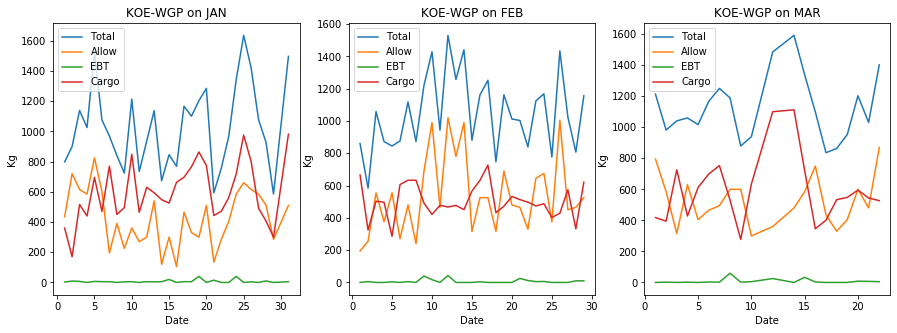

In [28]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
for j in range(len(label_to_plot)):
    plt.plot(dataset_tnn['KOE-WGP_JAN']["Date"], dataset_tnn['KOE-WGP_JAN'][label_to_plot[j]], label=label_for_ylabel[j])
plt.title('KOE-WGP on JAN')
plt.xlabel('Date')
plt.ylabel('Kg')
plt.legend(loc = 'best')

plt.subplot(1, 3, 2)
for j in range(len(label_to_plot)):
    plt.plot(dataset_tnn['KOE-WGP_FEB']["Date"], dataset_tnn['KOE-WGP_FEB'][label_to_plot[j]], label=label_for_ylabel[j])
    
plt.title('KOE-WGP on FEB')
plt.xlabel('Date')
plt.ylabel('Kg')
plt.legend(loc = 'best')

plt.subplot(1, 3, 3)
for j in range(len(label_to_plot)):
    plt.plot(dataset_tnn['KOE-WGP_MAR']["Date"], dataset_tnn['KOE-WGP_MAR'][label_to_plot[j]], label=label_for_ylabel[j])
    
plt.title('KOE-WGP on MAR')
plt.xlabel('Date')
plt.ylabel('Kg')
plt.legend(loc = 'best')

# Week Commencing

In [29]:
for route in list_of_route_tnn:
    dataset_tnn[route] = {}
    dataset_tnn[route]['raw_data'] = data_tnn[data_tnn['OrDes']==route]
    dataset_tnn[route]['raw_data']['Week'] = [week_number(each['Month'], each['Date']) for index, each in dataset_tnn[route]['raw_data'].iterrows()]

/Users/yudarhd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Month'] == 'MAR']

,OrDes,A/C Type,Date,Day,Month,Pax,Allow (KG),EBT Rev (IDR),EBT (KG),Cargo (KG),TOTAL (KG),Week
354,KOE-WGP,ATR 72,1,Sunday,MAR,53,795,0,0.0,418,1213.0,9
355,KOE-WGP,ATR 72,2,Monday,MAR,39,585,36364,2.0,395,982.0,10
356,KOE-WGP,ATR 72,3,Tuesday,MAR,21,315,0,0.0,726,1041.0,10
357,KOE-WGP,ATR 72,4,Wednesday,MAR,42,630,36364,2.0,428,1060.0,10
358,KOE-WGP,ATR 72,5,Thursday,MAR,27,405,0,0.0,612,1017.0,10
359,KOE-WGP,ATR 72,6,Friday,MAR,31,465,54546,3.0,699,1167.0,10
360,KOE-WGP,ATR 72,7,Saturday,MAR,33,495,36364,2.0,753,1250.0,10
361,KOE-WGP,ATR 72,8,Sunday,MAR,40,600,1072738,59.0,530,1189.0,10
362,KOE-WGP,ATR 72,9,Monday,MAR,40,600,36364,2.0,277,879.0,11
363,KOE-WGP,ATR 72,10,Tuesday,MAR,20,300,90910,5.0,634,939.0,11


In [31]:
for route in list_of_route_tnn:
    for week in range(0, max(dataset_tnn[route]['raw_data']['Week']), 4):
        buffer_data = dataset_tnn[route]['raw_data'][
            (dataset_tnn[route]['raw_data']['Week'] >=week+1) &
            (dataset_tnn[route]['raw_data']['Week'] <=week+4)
        ]
        buffer_data = buffer_data.drop(columns=['OrDes', 'A/C Type'])
        dataset_tnn[route][buffer_data.iloc[-1]['Month']] = buffer_data

In [32]:
dataset_tnn['KOE-WGP'].keys()

dict_keys(['raw_data', 'JAN', 'FEB', 'MAR'])

In [33]:
dataset_tnn['KOE-WGP']['raw_data']

,OrDes,A/C Type,Date,Day,Month,Pax,Allow (KG),EBT Rev (IDR),EBT (KG),Cargo (KG),TOTAL (KG),Week
0,KOE-WGP,ATR 72,1,Wednesday,JAN,29,435,54546,3.0,360,798.0,1
1,KOE-WGP,ATR 72,2,Thursday,JAN,48,720,163638,9.0,170,899.0,1
2,KOE-WGP,ATR 72,3,Friday,JAN,41,615,127274,7.0,516,1138.0,1
3,KOE-WGP,ATR 72,4,Saturday,JAN,39,585,0,0.0,440,1025.0,1
4,KOE-WGP,ATR 72,5,Sunday,JAN,55,825,127274,7.0,695,1527.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
369,KOE-WGP,ATR 72,18,Wednesday,MAR,22,330,0,0.0,533,863.0,12
370,KOE-WGP,ATR 72,19,Thursday,MAR,27,405,0,0.0,548,953.0,12
371,KOE-WGP,ATR 72,20,Friday,MAR,40,600,145456,8.0,595,1203.0,12
372,KOE-WGP,ATR 72,21,Saturday,MAR,32,480,127274,7.0,544,1031.0,12


In [34]:
koe_wgp_jan_w1 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 1]
koe_wgp_feb_w1 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 5]
koe_wgp_mar_w1 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 9]

koe_wgp_jan_w2 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 2]
koe_wgp_feb_w2 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 6]
koe_wgp_mar_w2 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 10]

koe_wgp_jan_w3 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 3]
koe_wgp_feb_w3 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 7]
koe_wgp_mar_w3 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 11]

koe_wgp_jan_w4 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 4]
koe_wgp_feb_w4 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 8]
koe_wgp_mar_w4 = dataset_tnn['KOE-WGP']['raw_data'][dataset_tnn['KOE-WGP']['raw_data']['Week'] == 12]

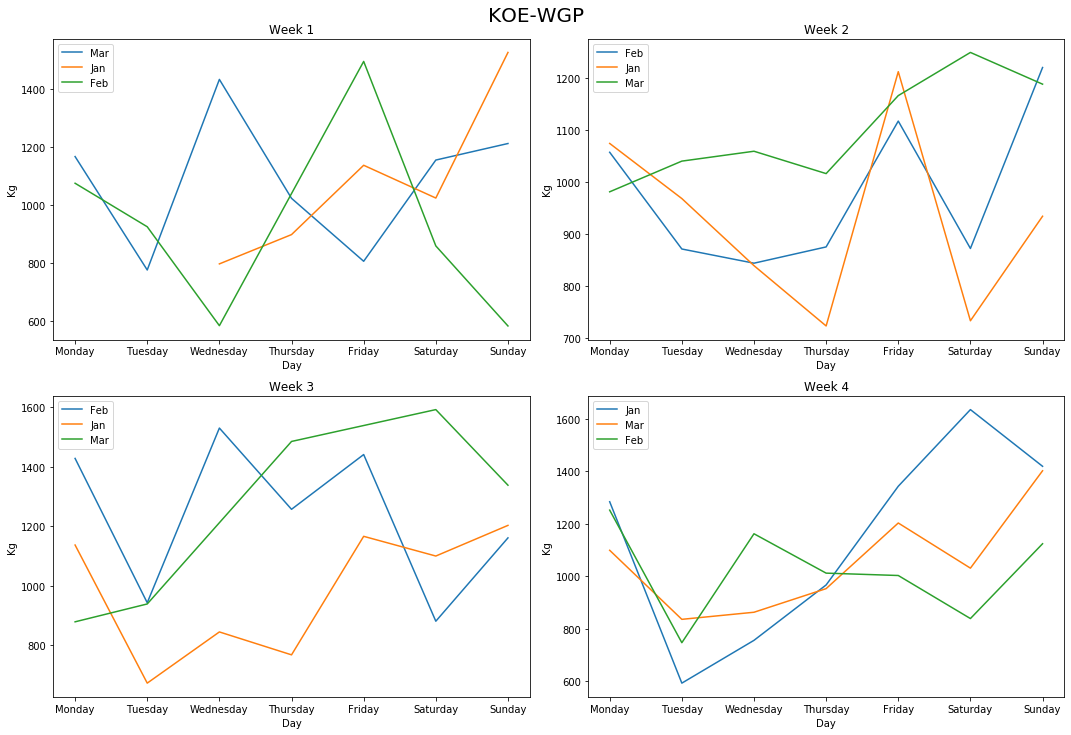

In [35]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(koe_wgp_mar_w1["Day"], koe_wgp_mar_w1["TOTAL (KG)"], label = "Mar")
plt.plot(koe_wgp_jan_w1["Day"], koe_wgp_jan_w1["TOTAL (KG)"], label = "Jan")
plt.plot(koe_wgp_feb_w1["Day"], koe_wgp_feb_w1["TOTAL (KG)"], label = "Feb")
plt.xlabel('Day')
plt.ylabel('Kg')
plt.title("Week 1")
plt.legend(loc = 'best')

plt.subplot(3,2,2)
plt.plot(koe_wgp_feb_w2["Day"], koe_wgp_feb_w2["TOTAL (KG)"], label = "Feb")
plt.plot(koe_wgp_jan_w2["Day"], koe_wgp_jan_w2["TOTAL (KG)"], label = "Jan")
plt.plot(koe_wgp_mar_w2["Day"], koe_wgp_mar_w2["TOTAL (KG)"], label = "Mar")
plt.xlabel('Day')
plt.ylabel('Kg')
plt.title("Week 2")
plt.legend(loc = 'best')

plt.subplot(3,2,3)
plt.plot(koe_wgp_feb_w3["Day"], koe_wgp_feb_w3["TOTAL (KG)"], label = "Feb")
plt.plot(koe_wgp_jan_w3["Day"], koe_wgp_jan_w3["TOTAL (KG)"], label = "Jan")
plt.plot(koe_wgp_mar_w3["Day"], koe_wgp_mar_w3["TOTAL (KG)"], label = "Mar")
plt.xlabel('Day')
plt.ylabel('Kg')
plt.title("Week 3")
plt.legend(loc = 'best')

plt.subplot(3,2,4)
plt.plot(koe_wgp_jan_w4["Day"], koe_wgp_jan_w4["TOTAL (KG)"], label = "Jan")
plt.plot(koe_wgp_mar_w4["Day"], koe_wgp_mar_w4["TOTAL (KG)"], label = "Mar")
plt.plot(koe_wgp_feb_w4["Day"], koe_wgp_feb_w4["TOTAL (KG)"], label = "Feb")

plt.xlabel('Day')
plt.ylabel('Kg')
plt.title("Week 4")
plt.legend(loc = 'best')

plt.suptitle('KOE-WGP', fontsize = 20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Average per day

In [36]:
koewgp_jan_value = []
koewgp_jan_total = []
koewgp_jan_ebt = []
koewgp_jan_pax = []
koewgp_jan_allow = []
koewgp_jan_cargo = []

for day in list_of_day:
    koewgp_jan_value.append(dataset_tnn['KOE-WGP']['JAN'][dataset_tnn['KOE-WGP']['JAN']['Day'] == day].mean())
    
for koewgp_jan in koewgp_jan_value:
    koewgp_jan_total.append(koewgp_jan['TOTAL (KG)'])
    koewgp_jan_ebt.append(koewgp_jan['EBT (KG)'])
    koewgp_jan_pax.append(koewgp_jan['Pax'])
    koewgp_jan_allow.append(koewgp_jan['Allow (KG)'])
    koewgp_jan_ebt.append(koewgp_jan['EBT (KG)'])
    
av_koewgp_jan = pd.DataFrame(columns=['Day', 'Pax', 'Allow (KG)', 'EBT (KG)', 'Cargo (KG)','Total (KG)'])

av_koewgp_jan['Day'] = list_of_day
av_koewgp_jan['Pax'] = [day['Pax'] for day in koewgp_jan_value]
av_koewgp_jan['Allow (KG)'] = [day['Allow (KG)'] for day in koewgp_jan_value]
av_koewgp_jan['EBT (KG)'] = [day['EBT (KG)'] for day in koewgp_jan_value]
av_koewgp_jan['Cargo (KG)'] = [day['Cargo (KG)'] for day in koewgp_jan_value]
av_koewgp_jan['Total (KG)'] = [day['TOTAL (KG)'] for day in koewgp_jan_value]


av_koewgp_jan

,Day,Pax,Allow (KG),EBT (KG),Cargo (KG),Total (KG)
0,Monday,36.666667,550.00,3.000000,612.333333,1165.333333
1,Tuesday,10.000000,150.00,8.333333,586.666667,745.000000
2,Wednesday,23.500000,352.50,5.750000,451.500000,809.750000
3,Thursday,24.250000,363.75,3.250000,472.500000,839.500000
4,Friday,33.750000,506.25,14.306869,694.500000,1215.056869
5,Saturday,30.750000,461.25,1.250000,661.000000,1123.500000
6,Sunday,34.000000,510.00,14.000000,747.000000,1271.000000


In [37]:
koewgp_feb_value = []
koewgp_feb_total = []
koewgp_feb_ebt = []
koewgp_feb_pax = []
koewgp_feb_allow = []
koewgp_feb_cargo = []

for day in list_of_day:
    koewgp_feb_value.append(dataset_tnn['KOE-WGP']['FEB'][dataset_tnn['KOE-WGP']['FEB']['Day'] == day].mean())
    
for koewgp_feb in koewgp_feb_value:
    koewgp_feb_total.append(koewgp_feb['TOTAL (KG)'])
    koewgp_feb_ebt.append(koewgp_feb['EBT (KG)'])
    koewgp_feb_pax.append(koewgp_feb['Pax'])
    koewgp_feb_allow.append(koewgp_feb['Allow (KG)'])
    koewgp_feb_ebt.append(koewgp_feb['EBT (KG)'])
    
    
av_koewgp_feb = pd.DataFrame(columns=['Day', 'Pax', 'Allow (KG)', 'EBT (KG)', 'Cargo (KG)','Total (KG)'])


av_koewgp_feb['Day'] = list_of_day
av_koewgp_feb['Pax'] = [day['Pax'] for day in koewgp_feb_value]
av_koewgp_feb['Allow (KG)'] = [day['Allow (KG)'] for day in koewgp_feb_value]
av_koewgp_feb['EBT (KG)'] = [day['EBT (KG)'] for day in koewgp_feb_value]
av_koewgp_feb['Cargo (KG)'] = [day['Cargo (KG)'] for day in koewgp_feb_value]
av_koewgp_feb['Total (KG)'] = [day['TOTAL (KG)'] for day in koewgp_feb_value]


av_koewgp_feb

,Day,Pax,Allow (KG),EBT (KG),Cargo (KG),Total (KG)
0,Monday,44.25,663.75,4.250000,535.500000,1203.500000
1,Tuesday,27.75,416.25,2.500000,453.250000,872.000000
2,Wednesday,42.50,637.50,11.678116,381.250000,1030.428116
3,Thursday,34.00,510.00,0.000000,538.333333,1048.333333
4,Friday,40.75,611.25,8.750000,644.500000,1264.500000
5,Saturday,18.00,270.00,3.000000,590.250000,863.250000
6,Sunday,35.25,528.75,13.500000,480.250000,1022.500000


In [38]:
koewgp_mar_value = []
koewgp_mar_total = []
koewgp_mar_ebt = []
koewgp_mar_pax = []
koewgp_mar_allow = []
koewgp_mar_cargo = []

for day in list_of_day:
    koewgp_mar_value.append(dataset_tnn['KOE-WGP']['MAR'][dataset_tnn['KOE-WGP']['MAR']['Day'] == day].mean())
    
for koewgp_mar in koewgp_mar_value:
    koewgp_mar_total.append(koewgp_mar['TOTAL (KG)'])
    koewgp_mar_ebt.append(koewgp_mar['EBT (KG)'])
    koewgp_mar_pax.append(koewgp_mar['Pax'])
    koewgp_mar_allow.append(koewgp_mar['Allow (KG)'])
    koewgp_mar_ebt.append(koewgp_mar['EBT (KG)'])
    
    
av_koewgp_mar = pd.DataFrame(columns=['Day', 'Pax', 'Allow (KG)', 'EBT (KG)', 'Cargo (KG)','Total (KG)'])


av_koewgp_mar['Day'] = list_of_day
av_koewgp_mar['Pax'] = [day['Pax'] for day in koewgp_mar_value]
av_koewgp_mar['Allow (KG)'] = [day['Allow (KG)'] for day in koewgp_mar_value]
av_koewgp_mar['EBT (KG)'] = [day['EBT (KG)'] for day in koewgp_mar_value]
av_koewgp_mar['Cargo (KG)'] = [day['Cargo (KG)'] for day in koewgp_mar_value]
av_koewgp_mar['Total (KG)'] = [day['TOTAL (KG)'] for day in koewgp_mar_value]


av_koewgp_mar

,Day,Pax,Allow (KG),EBT (KG),Cargo (KG),Total (KG)
0,Monday,43.500000,652.50,3.250000,376.250000,1032.00
1,Tuesday,23.750000,356.25,1.250000,540.750000,898.25
2,Wednesday,43.666667,655.00,0.666667,463.333333,1119.00
3,Thursday,27.000000,405.00,6.250000,708.500000,1119.75
4,Friday,34.000000,510.00,7.000000,542.000000,1059.00
5,Saturday,33.000000,495.00,4.750000,757.500000,1257.25
6,Sunday,47.500000,712.50,24.250000,548.750000,1285.50


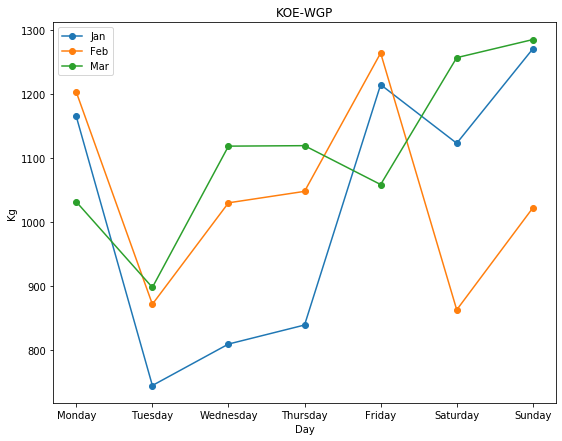

In [44]:
plt.figure(figsize=(9,7))
plt.plot(list_of_day, koewgp_jan_total, label = "Jan", marker = 'o')
plt.plot(list_of_day, koewgp_feb_total, label = "Feb", marker = 'o')
plt.plot(list_of_day, koewgp_mar_total, label = "Mar", marker = 'o')

plt.xlabel("Day")
plt.ylabel("Kg")
plt.title("KOE-WGP")
plt.legend(loc="best")

# Determine the distribution

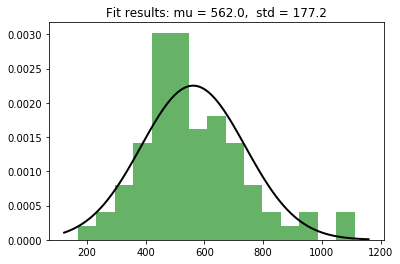

In [47]:
# Generate some data for this demonstration.
data = dataset_tnn['KOE-WGP']['raw_data']['Cargo (KG)']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(dataset_tnn['KOE-WGP']['raw_data']['Cargo (KG)'], bins=15, density = "True", alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.1f,  std = %.1f" % (mu, std)
plt.title(title)

plt.show()

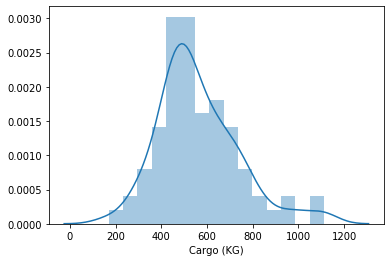

In [53]:
data = dataset_tnn['KOE-WGP']['raw_data']['Cargo (KG)']

sns.distplot(data, kde = True, bins = 15)
plt.show()

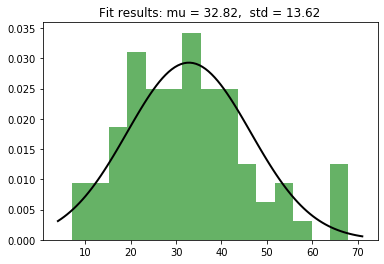

In [48]:
# Generate some data for this demonstration.
data = dataset_tnn['KOE-WGP']['raw_data']['Pax']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
#plt.hist(dataset_tnn['KOE-WGP']['raw_data']['Cargo (KG)'], bins = 15) #gaussian #rata rata std ev
plt.hist(dataset_tnn['KOE-WGP']['raw_data']['Pax'], bins=15, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

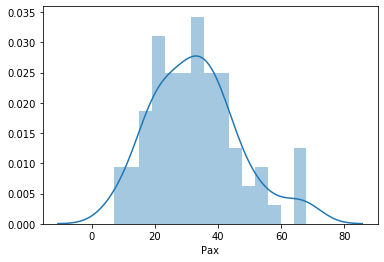

In [56]:
data = dataset_tnn['KOE-WGP']['raw_data']['Pax']

sns.distplot(data, kde = True, bins = 15)
plt.show()

In [49]:
dataset_tnn['KOE-WGP']['raw_data']['Pax'].describe(percentiles = np.arange(0.,1.1,0.1))

count    79.000000
mean     32.822785
std      13.707344
min       7.000000
0%        7.000000
10%      17.800000
20%      20.600000
30%      24.400000
40%      29.200000
50%      32.000000
60%      35.000000
70%      39.000000
80%      41.400000
90%      50.400000
100%     68.000000
max      68.000000
Name: Pax, dtype: float64

In [50]:
dataset_tnn['KOE-WGP']['raw_data']['Cargo (KG)'].describe(percentiles = np.arange(0.,1.1,0.1))

count      79.000000
mean      562.037975
std       178.379777
min       170.000000
0%        170.000000
10%       388.000000
20%       430.800000
30%       470.400000
40%       491.800000
50%       527.000000
60%       565.200000
70%       631.200000
80%       697.200000
90%       770.000000
100%     1112.000000
max      1112.000000
Name: Cargo (KG), dtype: float64

In [51]:
dataset_tnn['KOE-WGP']['raw_data']['TOTAL (KG)'].describe(percentiles = np.arange(0.,1.1,0.1))

count      79.000000
mean     1061.277721
std       247.428986
min       584.000000
0%        584.000000
10%       765.600000
20%       844.884985
30%       888.200000
40%       971.600000
50%      1041.000000
60%      1122.800000
70%      1167.600000
80%      1250.800000
90%      1429.200000
100%     1635.000000
max      1635.000000
Name: TOTAL (KG), dtype: float64

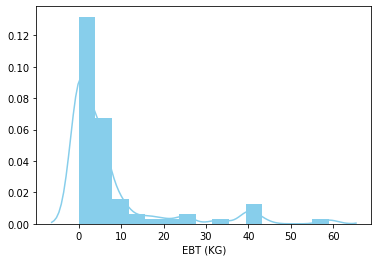

In [55]:
data_expon = dataset_tnn['KOE-WGP']['raw_data']['EBT (KG)']


ax = sns.distplot(data_expon,
                  kde=True,
                  bins=15,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

(0.0, 6.897973931653088)


/Users/yudarhd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


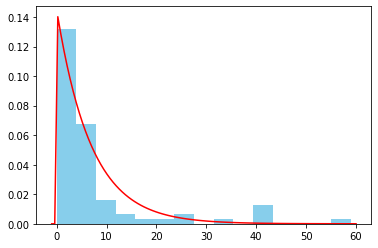

In [66]:
#EBT IS EXPONENTIAL DISTRIBUTION
import scipy.stats as ss

data = dataset_tnn['KOE-WGP']['raw_data']["EBT (KG)"]

P = ss.expon.fit(data)
print(P)

rX = np.linspace(-1.,60, 100)
rP = ss.expon.pdf(rX, *P)

#need to plot the normalized histogram with `normed=True`
plt.hist(data, normed=True, bins=15,
                  color='skyblue')
plt.plot(rX, rP, color = 'red')

# MC Rejection

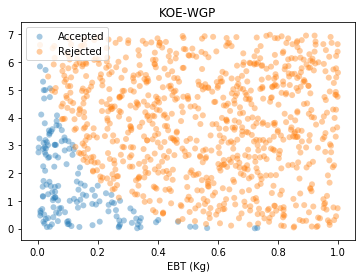

In [73]:
#EBT

y1 = []
x1 = []
p1 = []
x2 = []
y2 = []

for i in range(1000):
    lambda_ = 6.897

    x = np.random.uniform(0.,1.)
    p = lambda_*np.exp(-lambda_ * x)
    y = np.random.uniform(0,7.)
    if y < p:
        y1.append(y)
        x1.append(x)
        p1.append(p)
    else:
        x2.append(x)
        y2.append(y)
        
plt.scatter(x1,y1, alpha=0.4, edgecolors='none', label = "Accepted")
plt.scatter(x2,y2, alpha=0.4, edgecolors='none', label = "Rejected")
plt.xlabel("EBT (Kg)")
plt.title("KOE-WGP")
plt.legend(loc = "best")

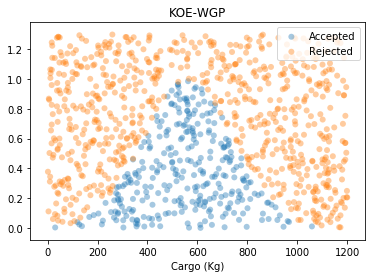

In [74]:
#CARGO

y3 = []
x3 = []
p1 = []
x2 = []
y2 = []

for i in range(1000):
    mu = 562
    sigma = 177.2

    x = np.random.uniform(0.,1200.)
    p = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))
    y = np.random.uniform(0,1.3)
    if y < p:
        y3.append(y)
        x3.append(x)
        p1.append(p)
    else:
        x2.append(x)
        y2.append(y)

plt.figure(0)
plt.scatter(x3,y3, alpha=0.4, edgecolors='none', label = "Accepted")
plt.scatter(x2,y2, alpha=0.4, edgecolors='none', label = "Rejected")
plt.xlabel("Cargo (Kg)")
plt.title("KOE-WGP")
plt.legend(loc = "best")

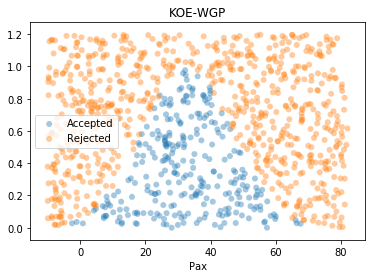

In [75]:
y4 = []
x4 = []
p1 = []
x2 = []
y2 = []

for i in range(1000):
    mu = 32.82
    sigma = 13.62

    x = np.random.uniform(-10.,82)
    p = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))
    y = np.random.uniform(0,1.2)
    if y < p:
        y4.append(y)
        x4.append(x)
        p1.append(p)
    else:
        x2.append(x)
        y2.append(y)
        
plt.figure(1)
plt.scatter(x4,y4, alpha=0.4, edgecolors='none', label = "Accepted")
plt.scatter(x2,y2, alpha=0.4, edgecolors='none', label = "Rejected")
plt.xlabel("Pax")
plt.title("KOE-WGP")
plt.legend(loc = "best")

# #Simulation 

In [76]:
def acc_cargo(mu, sigma):
    acc_cargo_x = []
    acc_cargo_y = []
    for i in range(10000):
        
        x = np.random.uniform(0.,1200.)
        p = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))
        y = np.random.uniform(0,1.3)
        if y < p:
            acc_cargo_y.append(y)
            acc_cargo_x.append(x)
    return acc_cargo_x, acc_cargo_y

def acc_pax(mu, sigma):
    acc_pax_x = []
    acc_pax_y = []
    for i in range(10000):
        
        x = np.random.uniform(0.,1200.)
        p = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))
        y = np.random.uniform(0,1.3)
        if y < p:
            acc_pax_y.append(y*15)
            acc_pax_x.append(x*15)
    return acc_pax_x, acc_pax_y

def acc_ebt(lambda_):
    acc_ebt_x, acc_ebt_y = [], []
    for i in range(10000):

        x = np.random.uniform(0.,1.5)
        p = lambda_*np.exp(-lambda_ * x)
        y = np.random.uniform(0,4.)
        if y < p:
            acc_ebt_y.append(y)
            acc_ebt_x.append(x)
    return acc_ebt_x, acc_ebt_y

In [82]:
cargo, mean_cargo = [], []
pax, mean_pax = [], []
ebt, mean_ebt = [], []
total, mean_total = [], []

iteration = 500

for i in range(iteration):
    acc_cargo_x, acc_cargo_y = acc_cargo(562, 177.2)
    acc_pax_x, acc_pax_y = acc_pax(32.82, 13.62)
    acc_ebt_x, acc_ebt_y = acc_ebt(6.897)
    cargo.extend(acc_cargo_x)
    pax.extend(acc_pax_x)
    ebt.extend(acc_ebt_x)
    tot = (cargo[i] + pax[i] + ebt[i])
    if tot <= 1200: #
        total.append(tot)
    mean_cargo.append(np.mean(cargo))
    mean_pax.append(np.mean(pax))
    mean_ebt.append(np.mean(ebt))
    mean_total.append(np.mean(total))
    print(i, np.mean(cargo), np.mean(pax), np.mean(ebt), np.mean(total))

print("Cargo:", "\u03BC", np.mean(mean_cargo),  '\u03C3: +/-', np.std(mean_cargo))
print("Allow:", "\u03BC", np.mean(mean_pax),  '\u03C3: +/-', np.std(mean_pax))
print("EBT:", "\u03BC", np.mean(mean_ebt),  '\u03C3: +/-', np.std(mean_ebt))
print("Total:", "\u03BC", np.mean(mean_total),  '\u03C3: +/-', np.std(mean_total))

acc_pax_x_mon = acc_pax_x
acc_cargo_x_mon = acc_cargo_x
acc_ebt_x_mon = acc_ebt_x
acc_total_x_mon = total

mean_pax_mon = mean_pax
mean_cargo_mon = mean_cargo
mean_ebt_mon = mean_ebt
mean_total_mon = mean_total

0 559.843191012647 480.06285426788395 0.16182251709301265 924.594302414285
1 561.5966314352622 494.47093345652326 0.16162682749606508 990.4019088850278
2 560.6686687593659 500.76355641841525 0.1610438496220771 1007.3746709409751
3 560.4696460271886 499.68222048257155 0.16135591398527652 891.5631442297381
4 560.7097131231666 504.75515117432195 0.16082645068312074 915.1538837323342
5 561.5421021363541 504.10724535807753 0.16042630317726814 906.446520864453
6 561.8423285218494 504.249727871115 0.16045969171135394 898.6969048806584
7 561.490392163013 502.84809511594574 0.16111130595166895 914.3917524711262
8 562.0876372541944 502.5136849618652 0.16145152069848326 916.0788684221383
9 562.020214518184 502.4536328913935 0.16128977940134237 916.0788684221383
10 562.1993738948755 502.88336986803466 0.16136380860020785 926.1318503141405
11 562.6003577977888 503.0010217835163 0.1613087090034413 926.1318503141405
12 562.7710464131585 504.0926406498179 0.16104174279823982 926.1318503141405
13 562.7

107 562.510939911911 498.60683853875094 0.1591032022685081 936.7643757792059
108 562.5457317081042 498.50340165480884 0.1591504942073024 936.7643757792059
109 562.450687304704 498.40174399164175 0.15913489940261427 940.012314344599
110 562.4501851299132 498.3846869901874 0.15908752937810022 939.4487441093519
111 562.4104815337909 498.5568562449232 0.15911658672604373 941.4644536896171
112 562.4068683091823 498.5211313930304 0.15911249474521005 940.5684089796554
113 562.3919221653512 498.682356016378 0.1591042333141768 940.5684089796554
114 562.4276359956384 498.65601181274747 0.15900538662024088 939.294568116488
115 562.461696920507 498.5894744003541 0.15898830498566124 941.4889859315307
116 562.4448871201303 498.6683407933117 0.15896159640383578 941.4889859315307
117 562.4716108058107 498.8857125363581 0.15892549123722188 940.5417805534615
118 562.4607941011787 498.73507240650247 0.15889694866425164 942.2580800038687
119 562.4243524013216 498.7258315322858 0.1589255268359866 942.25808

213 562.5819691346012 497.3152906362934 0.15933114067342294 941.4273441019425
214 562.5787744744421 497.3516750008581 0.15931659504075749 941.4273441019425
215 562.5808588278177 497.28903747233704 0.15932729530707943 940.0460465960107
216 562.5796382829744 497.235093850719 0.15929026687063355 938.6759301227822
217 562.5588585772624 497.4038584875034 0.159274696527026 939.896550782807
218 562.5618495727288 497.3942793906745 0.15927105801076244 939.896550782807
219 562.5640009666391 497.40830769048205 0.15928461990897597 939.7393162593756
220 562.5568472039645 497.36534966153727 0.15931952435406485 939.1608516667875
221 562.5503759862543 497.4821093864584 0.1593245165423083 939.1608516667875
222 562.535808612492 497.56466605234624 0.15932442312865486 939.1608516667875
223 562.5256802669089 497.5990207699204 0.15932519797443348 939.1608516667875
224 562.5174645009331 497.55298914735357 0.15931472048958087 939.1608516667875
225 562.548170496602 497.59058179284347 0.15928813992661284 937.12

319 562.2738624049018 496.9109227701901 0.1591616059510884 950.4441309186802
320 562.2625955704046 496.9667866007319 0.1591648800954443 950.5383016858779
321 562.2683592516945 496.8957764274564 0.15915186735742495 949.9099485572841
322 562.2878404595469 496.8430806334541 0.15916207286575149 949.9099485572841
323 562.2936068374663 496.85384860738816 0.15915452445335454 949.22642335804
324 562.2870418433537 496.8353370919058 0.15915715240245454 950.2916986123901
325 562.3005952150822 496.82508974287794 0.15916292532964646 950.4969587510343
326 562.3026535583214 496.8619207538169 0.15915317115834074 950.6878218894216
327 562.3009383655362 496.8338939649612 0.15913573781298 950.1085224932704
328 562.316056507187 496.84891548181633 0.15913562718120491 950.1085224932704
329 562.316702177398 496.8322265000529 0.15911580940110737 951.1561821086939
330 562.3222445703466 496.7335605916705 0.15912419000682174 951.074425472238
331 562.3215067901058 496.78086732200535 0.1591301966678808 951.8852729

425 562.3646153612576 497.03435867504834 0.15915912754391015 940.8773898766556
426 562.3652205064167 497.00013653668344 0.1591644042580877 940.6805101754937
427 562.3735392134539 496.97537722316775 0.15917132892517236 941.1451096700164
428 562.3681732195797 496.97310623020655 0.15917268284154026 941.1451096700164
429 562.3674681528471 496.9849120109344 0.15917067826875633 941.1451096700164
430 562.3768695168526 497.00284918406066 0.15916335344191793 940.6311499517642
431 562.376621615141 497.01068178571404 0.159166657261053 939.2486609215221
432 562.3855162244525 496.98426589575354 0.1591733945085648 939.2486609215221
433 562.3859826976305 496.94849508400796 0.15918399698340924 939.4980535593847
434 562.3909821231787 496.90484550086524 0.15921368156819618 939.7642441293305
435 562.3948179775932 496.9057199034831 0.15920881539843193 940.2183940892273
436 562.4021448873276 496.9370181488128 0.15920425446644354 940.1784366141414
437 562.4049595011004 496.9031416562114 0.15920819517888404 

Text(0, 0.5, 'Kg')

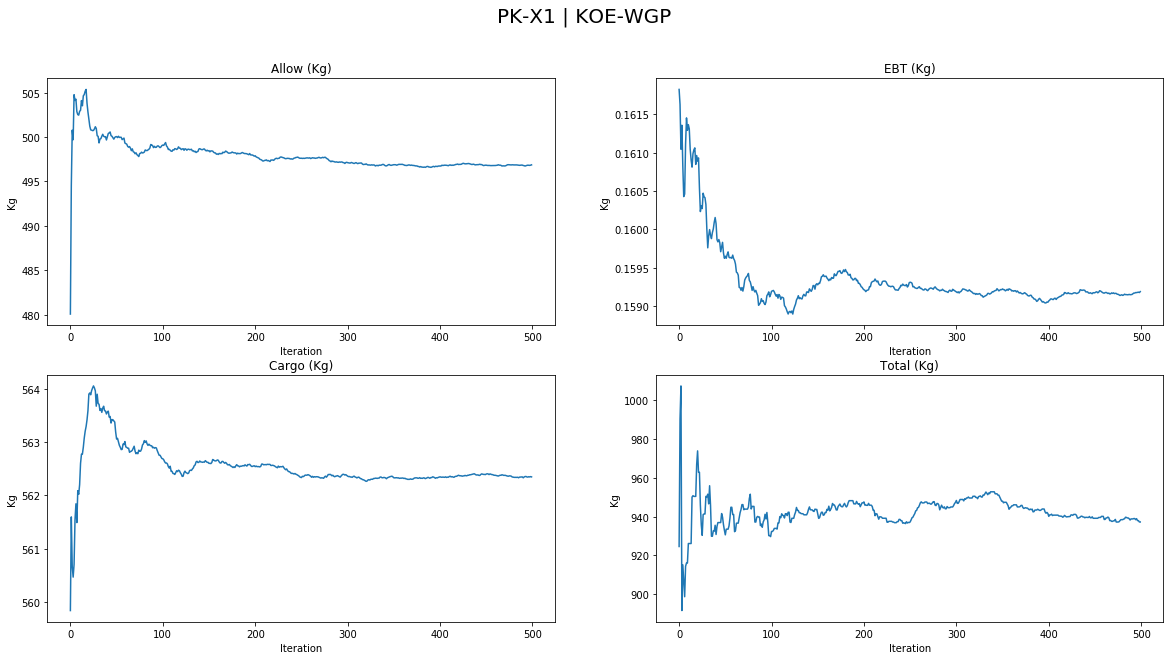

In [83]:
try_it = np.arange(0,iteration,1)

plt.figure(figsize=(20,10))
plt.suptitle("PK-X1 | KOE-WGP ", size = 20)
plt.subplot(2,2,1)
plt.plot(try_it, mean_pax)
plt.title("Allow (Kg)")
plt.xlabel("Iteration")
plt.ylabel("Kg")

plt.subplot(2,2,2)
plt.plot(try_it, mean_ebt)
plt.title("EBT (Kg)")
plt.xlabel("Iteration")
plt.ylabel("Kg")

plt.subplot(2,2,3)
plt.plot(try_it, mean_cargo)
plt.title("Cargo (Kg)")
plt.xlabel("Iteration")
plt.ylabel("Kg")

plt.subplot(2,2,4)
plt.plot(try_it, mean_total)
plt.title("Total (Kg)")
plt.xlabel("Iteration")
plt.ylabel("Kg")

Comparing with the model

Text(0.5, 1.0, 'KOE-WGP')

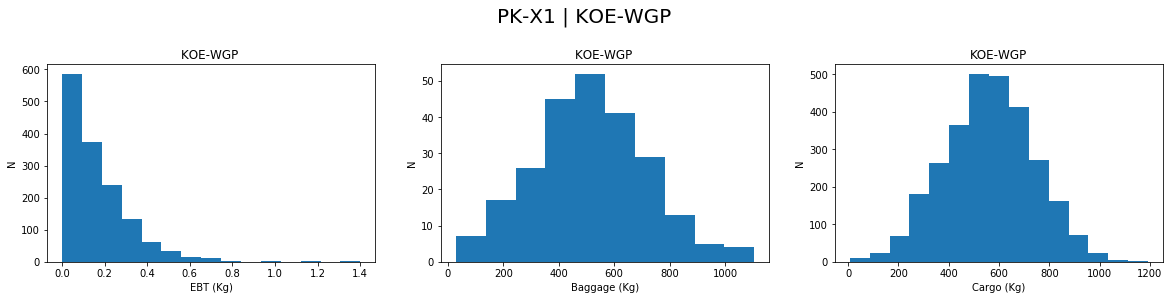

In [84]:
plt.figure(figsize=(20,8))
plt.suptitle("PK-X1 | KOE-WGP ", size = 20)

plt.subplot(2,3,1)
plt.hist(acc_ebt_x_mon, bins = 15)
plt.xlabel("EBT (Kg)")
plt.ylabel("N")
plt.title("KOE-WGP ")

plt.subplot(2,3,2)
plt.hist(acc_pax_x_mon, bins = 10)
plt.xlabel("Baggage (Kg)")
plt.ylabel("N")
plt.title("KOE-WGP ")

plt.subplot(2,3,3)
plt.hist(acc_cargo_x_mon, bins = 15)
plt.xlabel("Cargo (Kg)")
plt.ylabel("N")
plt.title("KOE-WGP")

Corner plot

In [91]:
#burn-in
mean_pax = mean_pax_mon
mean_cargo = mean_cargo_mon
mean_ebt = mean_ebt_mon
mean_total = mean_total_mon

<Figure size 720x864 with 0 Axes>

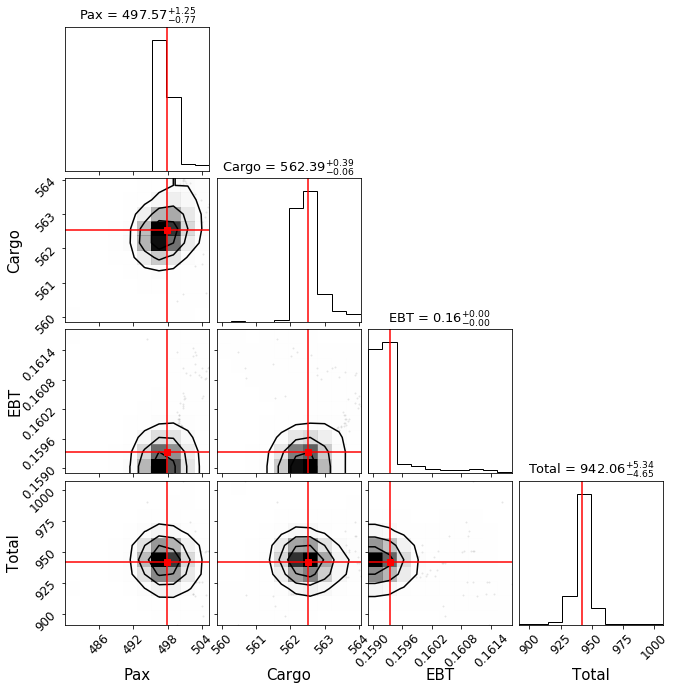

In [94]:
import corner

sample = np.column_stack((mean_pax, mean_cargo, mean_ebt, mean_total))
plt.figure(0, figsize = (10,12))
fig = corner.corner(sample,  bins = 10, labels = ['Pax', 'Cargo', 'EBT', 'Total'],
                    show_titles = True, title_kwargs = {'fontsize':13},
                    label_kwargs={'fontsize':15}, smooth = True)

axes = np.array(fig.axes).reshape((4,4))
mean_sample = np.mean(sample, axis = 0)

for i in range(4):
    ax = axes[i, i]
    ax.axvline(mean_sample[i], color = 'red')
    ax.tick_params(axis = 'x', labelsize = 12)
    
for yi in range(4):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(mean_sample[xi], color = 'red')
        ax.axhline(mean_sample[yi], color = 'red')
        ax.plot(mean_sample[xi], mean_sample[yi], 'sr')
        ax.tick_params(axis = 'x', labelsize = 12)
        ax.tick_params(axis = 'y', labelsize = 12)